## Purpose of this notebook:
### Mess around with the $\eta$ - $\phi$ data and see what their plots look like

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
import matplotlib.gridspec as gridspec

from pyjet import cluster, DTYPE_PTEPM
from pyjet.testdata import get_event
from matplotlib.colors import LogNorm
from atlasgan import reco

# Current Understanding of Data Layout
First Axis: Each individual interaction (size usually: very large)<br>
Second Axis: $\eta$ values (size usually: 64)<br>
Third Axis: $\phi$ value (size usually: 64)<br>

In [3]:
# If you need to find the current working director (cwd) for data_path you can use this block of code to find it:
# import os
# cwd = os.getcwd()
# print(cwd)

n_samples = 10**4

normalization_factor = 487
data_path = "/home/wyattblair/towahid/mu200_normalized_train.npy"
data_full = np.load(data_path)
data = data_full[:n_samples]
# for i in range(len(data)):
#     for j in range(len(data[i])):
#         for k in range(len(data[i][j])):
#             data[i][j][k] = data[i][j][k] * normalization_factor
for i in data:
    for j in i:
        for k in j:
            k = k*normalization_factor


# Wahid's draw_image function:
### Arguments:
• x: 2D numpy array to be plotted<br>
• vmin: float, minimum energy to clip at<br>
• vmax: float, maximum energy to clip at<br>
• xlabel: string, default=$\eta$<br>
• ylabel: string, default=$\phi$<br>
• draw_cbar: boolean, default=True, whether or not the color bar is drawn<br>
• ax: already existing axes (? <-- ask Wahid make sure that's right)<br>
• figize: tuple, figure size<br>

### Returns:
•Adds the image to the inputted axes

In [4]:
def draw_image(x, vmin=None, vmax=None, xlabel='$\eta$', ylabel='$\phi$',
               draw_cbar=True, ax=None, figsize=(5,4), **kwargs):
    if ax is None:
        _, ax = plt.subplots(figsize=figsize)
    cax = ax.imshow(x.T, extent=[-2.5, 2.5, -3.15, 3.15],
                    norm=LogNorm(vmin, vmax), aspect='auto',
                    origin='lower', **kwargs)
    if draw_cbar:
        cbar = plt.gcf().colorbar(cax, ax=ax)
        cbar.set_label('Energy')
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)

In [5]:
#Populate a list with 9 events from a chosen part of the data set (chosen via sample_seed)

sample_seed = 2
sample_events = []
for i in range(sample_seed, sample_seed+9):
    sample_events.append(data[i])

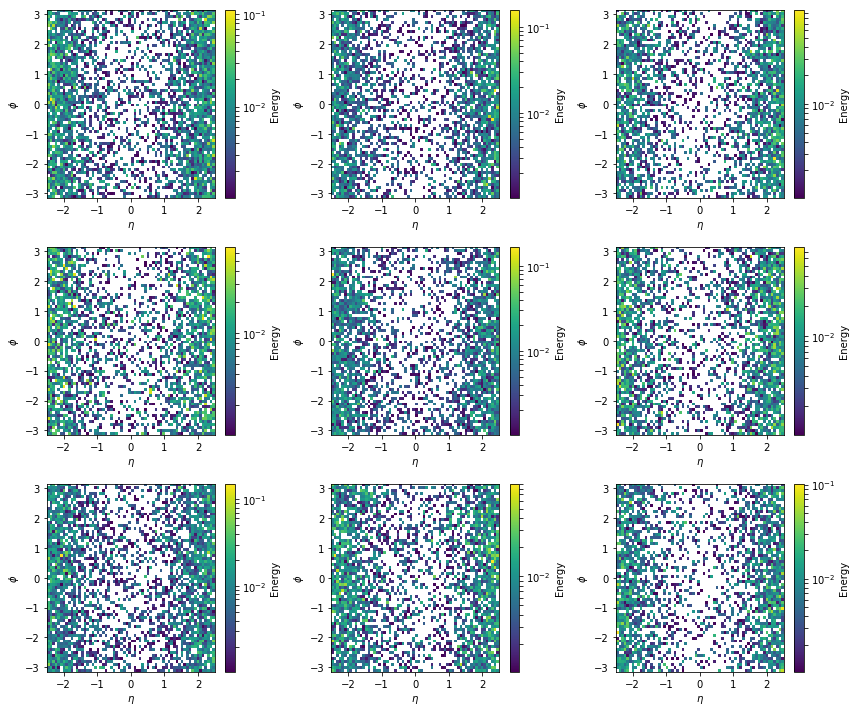

In [6]:
#Plot the events stored in sample_events using draw_image

fig, axs = plt.subplots(3,3, figsize=(12,10))
for i,ax in enumerate(axs.flatten()):
    draw_image(sample_events[i], ax=ax)
plt.tight_layout()

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0.0001, 1)

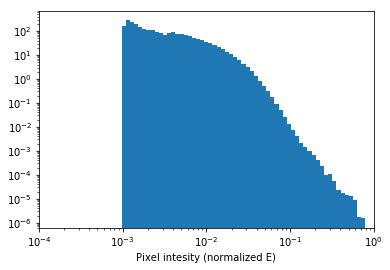

In [7]:
# Plot histogram of pixel intensities

plt.hist(data.flatten(),  bins=10**np.linspace(-4, -0.1, 80), normed=True,label='Validation');
plt.xlabel('Pixel intesity (normalized E)')
plt.yscale('log')
plt.xscale('log')
plt.xlim(10e-5,1)

# Now we're going to reconstruct some jets and plot their properties

The jets variable is a pandas dataframe, so you can use all of the helpful pandas functions on it

In [8]:
jets = reco.reconstruct_events(data)

print(type(jets))

<class 'pandas.core.frame.DataFrame'>


Length Jets: 0
Length Jets p_t: 0
Length Jets eta: 0
Length Jets phi: 0


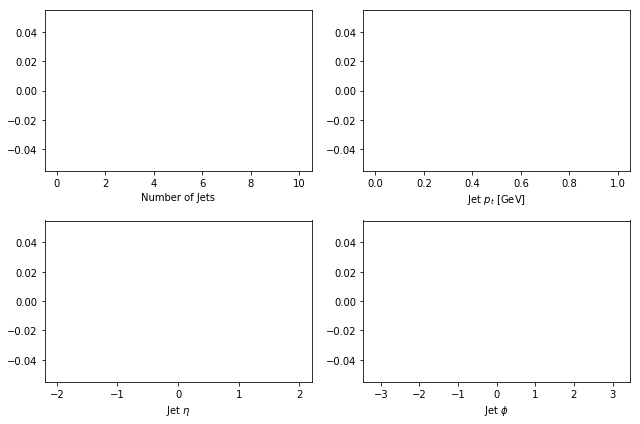

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(9,6))

# how many jets?
jetCount = jets.groupby('event').size()
ax1.hist(jetCount, bins=10, range=(0,10))
ax1.set_xlabel('Number of Jets')

ax2.hist(jets.pt, bins=20, range=(0,1))
ax2.set_xlabel('Jet $p_t$ [GeV]')

ax3.hist(jets.eta, bins= 20, range=(-2,2))
ax3.set_xlabel('Jet $\eta$')

ax4.hist(jets.phi, bins= 20, range= (-np.pi, np.pi))
ax4.set_xlabel('Jet $\phi$')

plt.tight_layout()

print("Length Jets: " + str(len(jets)))
print("Length Jets p_t: " + str(len(jets.pt)))
print("Length Jets eta: " + str(len(jets.eta)))
print("Length Jets phi: " + str(len(jets.phi)))

<Figure size 432x288 with 0 Axes>

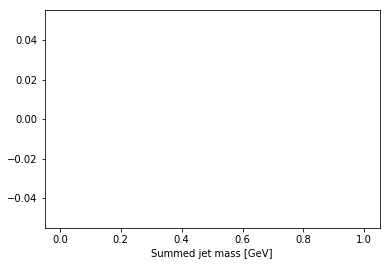

<Figure size 432x288 with 0 Axes>

In [10]:
# Sum of jet mass
sumMass = jets.groupby('event').apply(lambda x: x.m.sum())
plt.hist(sumMass*1e-3, bins=20)
plt.xlabel('Summed jet mass [GeV]');

plt.figure()